In [2]:
import yfinance as yf
import pandas as pd

### Indexes

In [3]:
# Define the ticker symbol for Nasdaq (NQ)
ticker = "NQ=F"  # ^IXIC is the Nasdaq Composite Index

# Create a Yahoo Finance object
nq = yf.Ticker(ticker)

# Download historical data from 1980 until now
data = nq.history(period="max")

# Print the first few rows of the data
print(data.head())


                             Open    High     Low   Close  Volume  Dividends  \
Date                                                                           
2000-09-18 00:00:00-04:00  3721.0  3785.5  3602.0  3653.5   72994        0.0   
2000-09-19 00:00:00-04:00  3658.5  3817.0  3656.0  3804.0   70029        0.0   
2000-09-20 00:00:00-04:00  3801.5  3874.0  3715.5  3853.0   78832        0.0   
2000-09-21 00:00:00-04:00  3852.0  3874.0  3744.0  3765.0   70719        0.0   
2000-09-22 00:00:00-04:00  3673.0  3780.0  3615.0  3776.0   55926        0.0   

                           Stock Splits  
Date                                     
2000-09-18 00:00:00-04:00           0.0  
2000-09-19 00:00:00-04:00           0.0  
2000-09-20 00:00:00-04:00           0.0  
2000-09-21 00:00:00-04:00           0.0  
2000-09-22 00:00:00-04:00           0.0  


In [4]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-18 00:00:00-04:00,3721.00,3785.50,3602.00,3653.50,72994,0.0,0.0
2000-09-19 00:00:00-04:00,3658.50,3817.00,3656.00,3804.00,70029,0.0,0.0
2000-09-20 00:00:00-04:00,3801.50,3874.00,3715.50,3853.00,78832,0.0,0.0
2000-09-21 00:00:00-04:00,3852.00,3874.00,3744.00,3765.00,70719,0.0,0.0
2000-09-22 00:00:00-04:00,3673.00,3780.00,3615.00,3776.00,55926,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-06 00:00:00-05:00,15187.00,15257.50,15138.00,15232.50,496129,0.0,0.0
2023-11-07 00:00:00-05:00,15215.00,15412.25,15176.00,15374.25,585124,0.0,0.0
2023-11-08 00:00:00-05:00,15373.00,15417.50,15286.75,15386.50,547842,0.0,0.0


In [5]:
futures_data = yf.download(["NQ=F","^IXIC", "^GSPC"], start="1980-01-01", end="2021-12-31", group_by= 'tickers')


[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

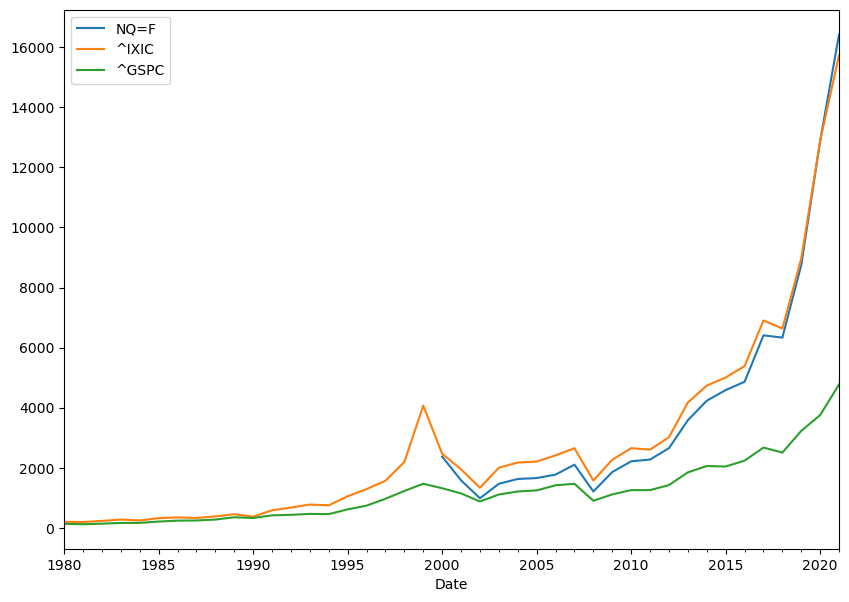

In [6]:
futures_data.xs('Close', level=1, axis=1).groupby(pd.Grouper(freq='Y')).agg(lambda x: x.iloc[-1]).plot(figsize=(10, 7))

### GDP

In [14]:
gdp = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5994720.csv", skiprows=4, index_col=0)

gdp.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN,NaN
Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,...,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720,NaN
Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,...,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN,NaN
Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,143.601581,...,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800,NaN
Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158,NaN


In [22]:
gdp = gdp[[col for col in gdp.columns if col.isdigit()]].copy(deep=True).T

gdp.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,161.638982,62.369375,107.423775,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,456.826375,NaN,NaN,NaN,529.561923,228.567399,276.643363
1961,NaN,161.111657,62.443703,112.503866,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,471.686740,NaN,NaN,NaN,543.042224,216.274674,279.332656
1962,NaN,170.538537,60.950364,118.197351,NaN,NaN,NaN,NaN,NaN,1163.186836,...,NaN,NaN,NaN,495.967407,NaN,NaN,NaN,560.699395,208.562685,275.966139
1963,NaN,198.038919,82.021738,122.774120,NaN,NaN,NaN,NaN,NaN,855.275656,...,NaN,NaN,NaN,523.401899,NaN,NaN,NaN,601.599951,209.453362,277.532515
1964,NaN,178.019217,85.511073,131.163760,NaN,NaN,NaN,NaN,NaN,1179.504098,...,NaN,NaN,NaN,561.424407,NaN,NaN,NaN,642.688431,236.941713,282.376856


<Axes: >

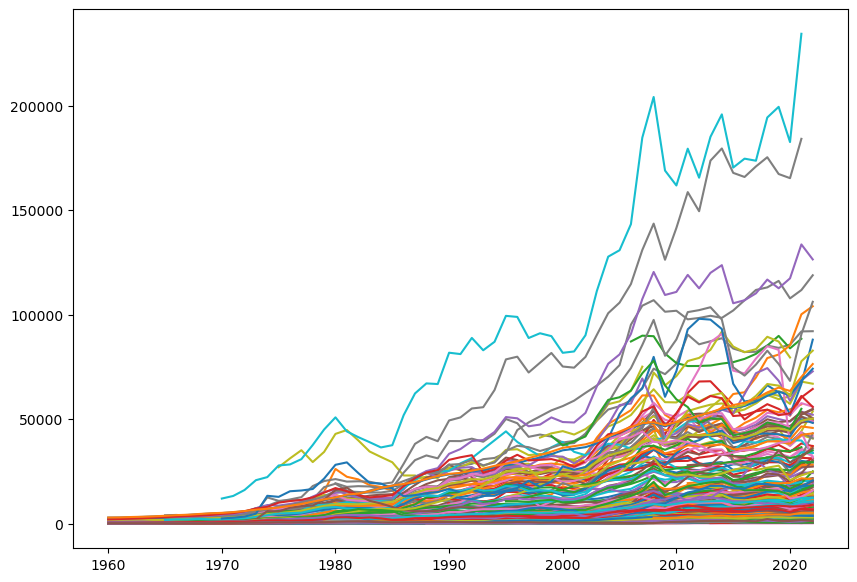

In [24]:
gdp.plot(figsize=(10, 7), legend=False)